In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Always make it pretty.
plt.style.use('ggplot')

You have a shuffled deck of 60 cards containing the following cards of special interest.  
  - Three of these cards in the deck are marked with a diamond.
  - Three of the cards are marked with a star.  
  - The remaining cards are nothing special.
    You draw an initial hand of five cards, after which you *must* discard any of the star cards for an additional three cards drawn from the top of the deck.  This process is repeated until you find yourself with a hand that does *not* contain any star cards.  Write a simulation to approximate the probability that your initial draw results in a final hand containing a diamond card. 


In [4]:
def generate_label(param_names, param_values):
    '''Generate parameter labels for the legend'''
    params = ["{}={}".format(name,value) for name, value in zip(param_names, param_values)
              if name is not None]
    return ", ".join(params)

def draw_pmf(ax, dist, param_names, param_values, xpts):
    '''draw a pmf as part of a set of pmfs'''
    label = generate_label(param_names, param_values)
    ax.bar(xpts, 
           [dist(*param_values).pmf(x) for x in xpts], 
           label=label, 
           align='center',
           color='grey')
    
def draw_pmf_grid(dist, param_names, param_values, xpts, height=2):
    '''draw several pmfs for for various parameter values for a given distribution'''
    figsize = (12, height * len(param_values))
    fig = plt.figure(figsize=figsize)
    for i, pv in enumerate(param_values, start=1):
        if i == 1:
            ax = ax1 = fig.add_subplot(len(param_values), 1, i)
        else:
            ax = fig.add_subplot(len(param_values), 1, i, sharey=ax1)
        draw_pmf(ax, dist, param_names, pv, xpts)
        ax.set_ylabel('p')
        ax.set_ylim(bottom=0)
        ax.set_xlim(left=min(xpts) - 0.5, right=max(xpts) + 0.5)
        ax.legend()
        plt.xticks(np.arange(min(xpts), np.ceil(max(xpts))+1)) ## force integer ticks
    plt.show()

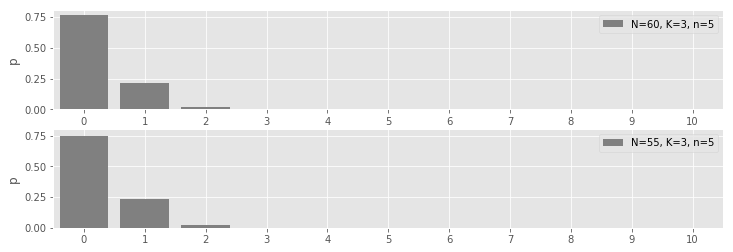

In [10]:
draw_pmf_grid(stats.hypergeom,('N','K','n'), [(60, 3, 5), (55, 3, 5)], range(0,11))

In [51]:
# Probablity of drawing a star in your first hand
def hyper_mass(N, K, n, repeats):
    lst = []
    for i in range(repeats):
        sample = np.mean(stats.hypergeom(N,K,n).rvs(100))
        lst.append(sample)
    return lst
    

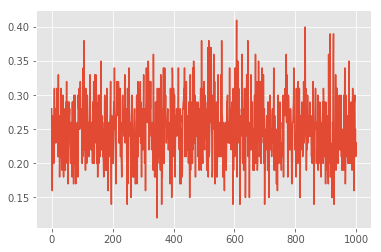

In [54]:
lst_hyper_mass = hyper_mass(60,3,5,1000)
plt.plot(lst_hyper_mass)

In [64]:
# Probablity of drawing all three 3 stars that allows more draws
stats.hypergeom(60,3,5).pmf(1)+ stats.hypergeom(55,2,3).pmf(1)+ stats.hypergeom(52,1,3).pmf(1)

0.3797211879619831

In [74]:
Draw_3 = stats.hypergeom(60,3,5).pmf(3) +stats.hypergeom(60,3,5).pmf(2) + stats.hypergeom(60,3,5).pmf(1)
Draw_2 =

0.23334307422559958

In [68]:
0.37972 * stats.hypergeom(52,3,3).pmf(1)

0.06061774479638019

In [19]:
# Probablity of drawing a star on the next three top deck draws
stats.hypergeom(55,2,3).pmf(1)

0.10505050505050484

In [20]:
stats.hypergeom(52,1,3).pmf(1)

0.05769230769230775

In [21]:
stats.hypergeom(60,3,5).pmf(3)

0.00029222676797194675